In [1]:
# import package which is necessary
import h5py
import numpy as np
import os
print(os.listdir(r'c:\Users\Administrator\Desktop\5318\As1\Assignment 1\Input'))
import matplotlib.pyplot as plt


['.DS_Store', 'test', 'train']


In [2]:
with h5py.File(r'c:\Users\Administrator\Desktop\5318\As1\Assignment 1\Input\train\images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File(r'c:\Users\Administrator\Desktop\5318\As1\Assignment 1\Input\train\labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])
    
with h5py.File(r'c:\Users\Administrator\Desktop\5318\As1\Assignment 1\Input\test\images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File(r'c:\Users\Administrator\Desktop\5318\As1\Assignment 1\Input\test\labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
    
# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)
print(data_test.shape,label_test.shape)

(30000, 784) (30000,)
(5000, 784) (2000,)


In [3]:
# Data preprocess

X_train  = data_train[:]
y_train = label_train[:]

X_test = data_test
X_test_2000 = data_test[:2000]
y_test_2000 = label_test[:2000]

In [4]:
# Check whether the training data is loaded
print(X_train.shape)
print(y_train.shape)

(30000, 784)
(30000,)


In [5]:
#Nomalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_test_2000_norm = scaler.transform(X_test_2000)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
newX = pca.fit_transform(X_train_norm)
print("Original shape of training data: {}".format(str(X_train_norm.shape)))

Original shape of training data: (30000, 784)


In [7]:
pca.explained_variance_

array([19.862465  , 12.112564  ,  4.108854  ,  3.3728406 ,  2.6150494 ,
        2.3573587 ,  1.6123472 ,  1.282176  ,  0.9263128 ,  0.89522886,
        0.6737442 ,  0.6223412 ,  0.5245101 ,  0.449705  ,  0.4151739 ,
        0.40263236,  0.37980404,  0.36295652,  0.31557068,  0.31193125,
        0.29447186,  0.276968  ,  0.26331457,  0.25408608,  0.24866849,
        0.241643  ,  0.22790653,  0.21896474,  0.21110089,  0.19868839,
        0.19003925,  0.1831702 ,  0.17997402,  0.17439128,  0.1691016 ,
        0.16170694,  0.15718772,  0.15387803,  0.15001157,  0.14431983,
        0.13782926,  0.13390933,  0.13174415,  0.12506318,  0.11905049,
        0.11783815,  0.11481277,  0.11316898,  0.11024868,  0.10628203,
        0.1050783 ,  0.10331121,  0.10070233,  0.09785675,  0.09403075,
        0.09321637,  0.08983375,  0.08792966,  0.0869443 ,  0.08561658,
        0.08379522,  0.08209041,  0.08100168,  0.07968439,  0.07883253,
        0.07707019,  0.07605038,  0.07542803,  0.07250121,  0.07

# 1.First Classifier K-Nearest Neighbor

In [63]:
#import related package
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from time import time
from sklearn.neighbors import KNeighborsClassifier

#Set parameters
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'p': [1, 2]}

#set 10-fold cross-validation
cvK = StratifiedKFold(n_splits=10,shuffle =True,random_state=None)

#used to set accuracy
acc_knn =[]

#used to set running time
time_knn = []

#find the best parameters using grid search with 10-fold stratified cross validation.
for p in param_grid_knn["p"]:
    #calculate the average accuracy of each circle
    acc_average = []
    #record each circle's running time as a list
    time_each = []
    
    for n_neighbors in param_grid_knn["n_neighbors"]:
       
        #record each circle's accuracy
        acc_each=[]
        
        #record beginning time
        begin = time()
    
        #traverse the train data
        for train_index,valid_index in cvK.split(X_train_norm,y_train):
            X_train_spilt, X_valid = X_train_norm[train_index],X_train_norm[valid_index]
            y_train_spilt, y_valid = y_train[train_index],y_train[valid_index]
            
            #establish a knn classifier model
            # n_jobs = -1, the number of jobs is set to the number of CPU cores, while doesn't affect fit method
            knn = KNeighborsClassifier(n_neighbors = n_neighbors, p=p, n_jobs = -1) 
            knn.fit(X_train_spilt ,y_train_spilt)
            #prediction
            y_pred = knn.predict(X_valid)
            #accuracy
            acc_each.append(accuracy_score(y_pred,y_valid))
        #Keep two decimal places
        acc_average.append(np.around(np.mean(acc_each)*100,2))
        #upload running time 
        time_each.append(time()-begin)
        
        #output the result
        print("When n_neighbors = %d, p = %d, the accuracy is %.2f%% and running time is %.2fsecond" %(n_neighbors,
                                                                                                       p,acc_average[-1],
                                                                                                       time_each[-1]))
    acc_knn.append(acc_average)
    time_knn.append(time_each)

KeyboardInterrupt: 

In [70]:
#import related package
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from time import time
from sklearn.neighbors import KNeighborsClassifier

#Set parameters
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'p': [1, 2,6]}

#set 10-fold cross-validation
cvK = StratifiedKFold(n_splits=10,shuffle =True,random_state=None)

#used to set accuracy
acc_knn =[]

#used to set running time
time_knn = []

#find the best parameters using grid search with 10-fold stratified cross validation.
for p in param_grid_knn["p"]:
    #calculate the average accuracy of each circle
    acc_average = []
    #record each circle's running time as a list
    time_each = []
    
    for n_neighbors in param_grid_knn["n_neighbors"]:
       
        #record each circle's accuracy
        acc_each=[]
        
        #record beginning time
        begin = time()
    
        #traverse the train data
        for train_index,valid_index in cvK.split(newX,y_train):
            X_train_spilt, X_valid = newX[train_index],newX[valid_index]
            y_train_spilt, y_valid = y_train[train_index],y_train[valid_index]
            
            #establish a knn classifier model
            # n_jobs = -1, the number of jobs is set to the number of CPU cores, while doesn't affect fit method
            knn = KNeighborsClassifier(n_neighbors = n_neighbors, p=p, n_jobs = -1) 
            knn.fit(X_train_spilt ,y_train_spilt)
            #prediction
            y_pred = knn.predict(X_valid)
            #accuracy
            acc_each.append(accuracy_score(y_pred,y_valid))
        #Keep two decimal places
        acc_average.append(np.around(np.mean(acc_each)*100,2))
        #upload running time 
        time_each.append(time()-begin)
        
        #output the result
        print("When n_neighbors = %d, p = %d, the accuracy is %.2f%% and running time is %.2fsecond" %(n_neighbors,
                                                                                                       p,acc_average[-1],
                                                                                                       time_each[-1]))
    acc_knn.append(acc_average)
    time_knn.append(time_each)

When n_neighbors = 1, p = 1, the accuracy is 84.60% and running time is 41.53second
When n_neighbors = 2, p = 1, the accuracy is 84.32% and running time is 42.48second
When n_neighbors = 3, p = 1, the accuracy is 85.65% and running time is 43.69second
When n_neighbors = 4, p = 1, the accuracy is 85.74% and running time is 45.96second
When n_neighbors = 5, p = 1, the accuracy is 85.84% and running time is 45.96second
When n_neighbors = 6, p = 1, the accuracy is 85.99% and running time is 45.85second
When n_neighbors = 7, p = 1, the accuracy is 85.95% and running time is 46.01second
When n_neighbors = 8, p = 1, the accuracy is 85.99% and running time is 46.74second
When n_neighbors = 9, p = 1, the accuracy is 85.84% and running time is 45.67second
When n_neighbors = 10, p = 1, the accuracy is 85.75% and running time is 46.03second
When n_neighbors = 1, p = 2, the accuracy is 83.98% and running time is 20.59second
When n_neighbors = 2, p = 2, the accuracy is 83.95% and running time is 19.

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid_knn, cv=10,
                          return_train_score=True)
grid_search.fit(X_train_norm ,y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test_norm, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [37]:
def knn_plot():
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(param_grid_knn["n_neighbors"], acc_knn[0])
    plt.plot(param_grid_knn["n_neighbors"], acc_knn[1])
    plt.legend(["p=1","p=2"])
    plt.xticks(param_grid_knn["n_neighbors"]) 
    plt.title("Running time of K-Nearest-Neighbors")
    plt.ylabel("Accuracy(%)")
    plt.xlabel("n_neighbors")

    plt.subplot(2,2,2)
    plt.plot(param_grid_knn["n_neighbors"], time_knn[0])
    plt.plot(param_grid_knn["n_neighbors"], time_knn[1])
    plt.legend(["p=1","p=2"])
    plt.xticks(param_grid_knn["n_neighbors"]) 
    plt.title("Running time of K-Nearest-Neighbors")
    plt.ylabel("time(s)")
    plt.xlabel("n_neighbors")
    
    plt.show()

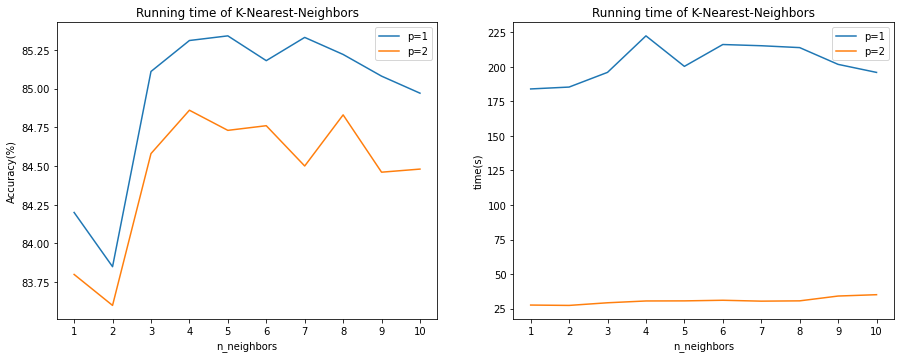

In [38]:
knn_plot()

In [65]:
knn_best = KNeighborsClassifier(n_neighbors=8 , p=1, n_jobs = -1)
knn_best.fit(X_train_norm,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8, p=1)

In [66]:
y_pred_knn = knn_best.predict(X_test_2000_norm)
acc_knn_test = accuracy_score(y_test_2000,y_pred_knn)
print("the accuracy is %.2f%%" %(acc_knn_test*100))

the accuracy is 83.05%


# 2.Second Classifier Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from time import time

#set 10-fold cross-validation
cvK = StratifiedKFold(n_splits=10,shuffle =True,random_state=None)
#used to set accuracy
acc_Gnb = 0
#used to set running time
time_Gnb = 0
#record each circle's accuracy
acc_each=[]      
#record beginning time
begin = time()

#traverse the train data
for train_index,valid_index in cvK.split(newX,y_train):
    X_train_new, X_valid = newX[train_index],newX[valid_index]
    y_train_new, y_valid = y_train[train_index],y_train[valid_index]
    Gnb = GaussianNB()
    Gnb.fit(X_train_new,y_train_new)
    y_pred = Gnb.predict(X_valid)
    
    acc_each.append(accuracy_score(y_pred,y_valid))
acc_Gnb = np.around(np.mean(acc_each)*100,2)
#upload running time 
time_Gnb = time()-begin
#output the result
print("the accuracy is %.2f%% and running time is %.2fsecond" %(acc_Gnb,time_Gnb))

the accuracy is 72.07% and running time is 0.07second


# 3.Third Classifier DecisionTree


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from time import time
param_grid_tree = {'tree_depth': [*range(1,20)]}


#set 10-fold cross-validation
cvK = StratifiedKFold(n_splits=10,shuffle =True,random_state=None)

acc_t = []
time_t = []
#used to set accuracy
acc_tree = []
#used to set running time
time_tree = []


for tree_depth in param_grid_tree["tree_depth"]:
    #record each circle's accuracy
    acc_each=[]      
    #record beginning time
    begin = time()
    
     #traverse the train data
    for train_index,valid_index in cvK.split(newX,y_train):
        X_train_spilt, X_valid = newX[train_index],newX[valid_index]
        y_train_spilt, y_valid = y_train[train_index],y_train[valid_index]
        
        tree =  DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state=42)    
        tree.fit(X_train_spilt ,y_train_spilt)
        #prediction
        y_pred = tree.predict(X_valid)
        #accuracy
        acc_each.append(accuracy_score(y_pred,y_valid))
    
    #Keep two decimal places
    acc_tree.append(np.around(np.mean(acc_each)*100,2))
    #upload running time 
    time_tree.append(time()-begin)
        
    #output the result
    print("When tree_depth = %d, the accuracy is %.2f%% and running time is %.2fsecond" %(tree_depth,
                                                                                              acc_tree[-1],
                                                                                              time_tree[-1]))
acc_t.append(acc_tree)
time_t.append(time_tree)


When tree_depth = 1, the accuracy is 20.57% and running time is 1.81second
When tree_depth = 2, the accuracy is 34.70% and running time is 3.43second
When tree_depth = 3, the accuracy is 54.30% and running time is 4.88second
When tree_depth = 4, the accuracy is 62.20% and running time is 6.07second
When tree_depth = 5, the accuracy is 65.67% and running time is 7.42second
When tree_depth = 6, the accuracy is 68.90% and running time is 9.74second
When tree_depth = 7, the accuracy is 70.50% and running time is 13.57second
When tree_depth = 8, the accuracy is 70.53% and running time is 11.25second
When tree_depth = 9, the accuracy is 70.93% and running time is 11.04second
When tree_depth = 10, the accuracy is 70.07% and running time is 11.00second


KeyboardInterrupt: 

In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(5,20)]
              }

clf = DecisionTreeClassifier(random_state=30)

#n_jobs=-1指定全部cpu的核跑，cv指定交叉验证

GS = GridSearchCV(clf, parameters, cv=10,n_jobs=-1)
grid_result = GS.fit(newX, y_train) #运行网格搜索
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}

In [73]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
0.7332000000000001


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(5,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_samples_split':[*range(1,50,5)]}
grid_search = GridSearchCV(DecisionTreeClassifier,parameters, cv=10,
                          return_train_score=True)
grid_search.fit(X_train_norm ,y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test_norm, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [29]:
def tree_plot():
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(param_grid_tree["tree_depth"], acc_t[0])
    plt.xticks(param_grid_tree["tree_depth"]) 
    plt.title("The accuracy of Decision Tree")
    plt.ylabel("Accuracy(%)")
    plt.xlabel("tree depth")
    
    plt.subplot(2,2,2)
    plt.plot(param_grid_tree["tree_depth"], time_t[0])
    plt.xticks(param_grid_tree["tree_depth"]) 
    plt.title("Running time of Decision Tree")
    plt.ylabel("time")
    plt.xlabel("tree depth")
    
    plt.show()

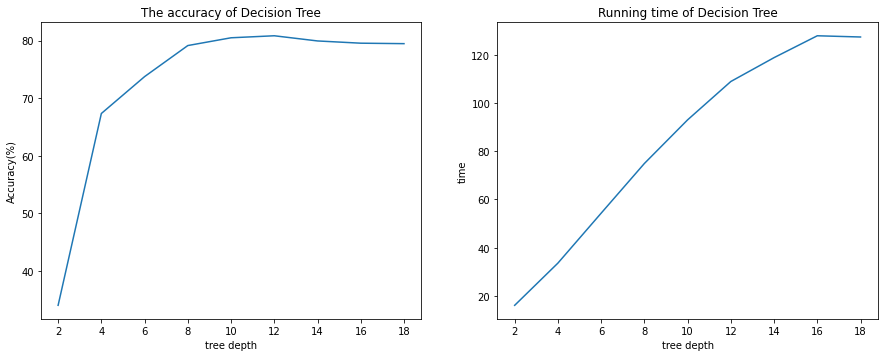

In [30]:
tree_plot()

# 4. Fourth Classifier LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from time import time
param_grid_lr ={'max_iter':[*range(50,1000,50)],
                'penalty':['l1','l2']}

#set 10-fold cross-validation
cvK = StratifiedKFold(n_splits=10,shuffle =True,random_state=None)

acc_lr= []
time_lr = []

for penalty in param_grid_lr["penalty"]:
    
    acc_average = []
    
    time_each = []
    for max_iter in param_grid_lr["max_iter"]:
        acc_each=[]
        begin = time()
        
        #traverse the train data
        for train_index,valid_index in cvK.split(X_train_norm,y_train):
            X_train_spilt, X_valid = X_train_norm[train_index],X_train_norm[valid_index]
            y_train_spilt, y_valid = y_train[train_index],y_train[valid_index]
            
            lr = LogisticRegression(max_iter = max_iter,
                                   penalty = penalty,
                                   solver = 'liblinear')
            lr.fit(X_train_spilt,y_train_spilt)
            
            y_pred = lr.predict(X_valid)
            
            acc_each.append(accuracy_score(y_pred,y_valid))
            
        #Keep two decimal places
        acc_average.append(np.around(np.mean(acc_each)*100,2))
        #upload running time 
        time_each.append(time()-begin)
        
         #output the result
        print("When max_iter = %d, penalty = %s, the accuracy is %.2f%% and running time is %.2fsecond" %(max_iter,
                                                                                                       penalty,acc_average[-1],
                                                                                                       time_each[-1]))
    acc_lr.append(acc_average)
    time_lr.append(time_each)
            

When max_iter = 50, penalty = l1, the accuracy is 85.18% and running time is 666.30second
When max_iter = 100, penalty = l1, the accuracy is 85.16% and running time is 772.22second
When max_iter = 150, penalty = l1, the accuracy is 85.33% and running time is 510.75second
When max_iter = 200, penalty = l1, the accuracy is 85.15% and running time is 504.05second
When max_iter = 250, penalty = l1, the accuracy is 85.31% and running time is 499.99second
When max_iter = 300, penalty = l1, the accuracy is 85.13% and running time is 4931.79second
When max_iter = 350, penalty = l1, the accuracy is 85.19% and running time is 504.01second
When max_iter = 400, penalty = l1, the accuracy is 85.24% and running time is 520.07second
When max_iter = 450, penalty = l1, the accuracy is 85.25% and running time is 530.69second
When max_iter = 500, penalty = l1, the accuracy is 85.14% and running time is 547.44second
When max_iter = 550, penalty = l1, the accuracy is 85.26% and running time is 545.62second

In [68]:
def lr_plot():
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.plot(param_grid_lr["max_iter"], acc_lr[0])
    plt.plot(param_grid_lr["max_iter"], acc_lr[1])
    plt.legend(["penalty=l1","penalty=l2"])
    plt.xticks(param_grid_lr["max_iter"]) 
    plt.title( "The accuracy of Logtistic Regression") 
    plt.ylabel("Accuracy(%)")
    plt.xlabel("max_iter")

    plt.subplot(2,2,2)
    plt.plot(param_grid_lr["max_iter"], time_lr[0])
    plt.plot(param_grid_lr["max_iter"], time_lr[1])
    plt.legend(["penalty=l1","penalty=l2"])
    plt.xticks(param_grid_lr["max_iter"])
    plt.title("Running time of Logtistic Regression")
    plt.ylabel("time(s)")
    plt.xlabel("max_iter")
    
    plt.show()

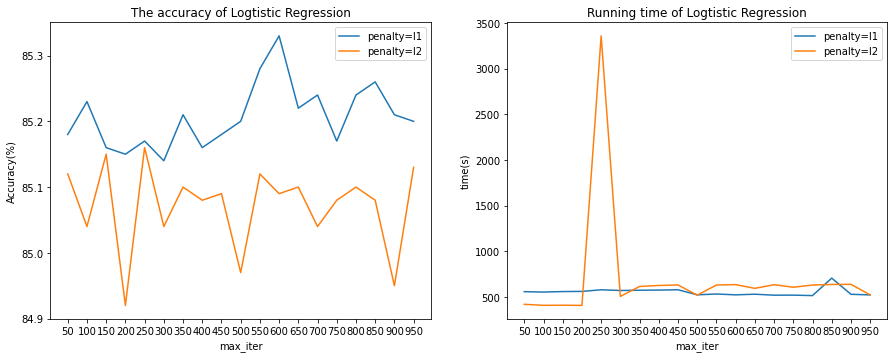

In [69]:
lr_plot()